In [14]:
import pandas as pd

results_df = pd.read_csv("results.csv")
results_df["rmse"] = -results_df["neg_rmse"]
results_df["model"]

0            catboost
1            catboost
2            catboost
3            catboost
4            catboost
            ...      
2290    random_forest
2291    random_forest
2292    random_forest
2293    random_forest
2294    random_forest
Name: model, Length: 2295, dtype: object

In [15]:
def tag_preprocess_rfe(row):
    if row['preprocess_mode']:
        return f"{row['preprocess_mode']}-use-rfe" if row['use_rfe'] else row['preprocess_mode']
    else:
        return 'none'

results_df['preprocess_rfe_mode'] = results_df.apply(tag_preprocess_rfe, axis=1)

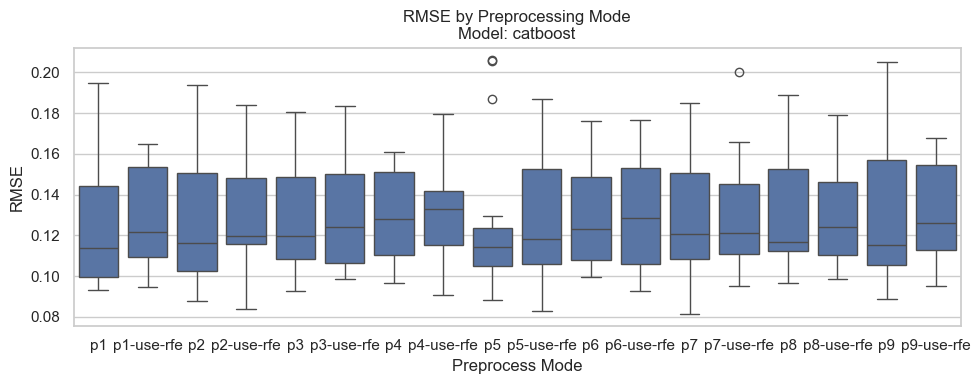

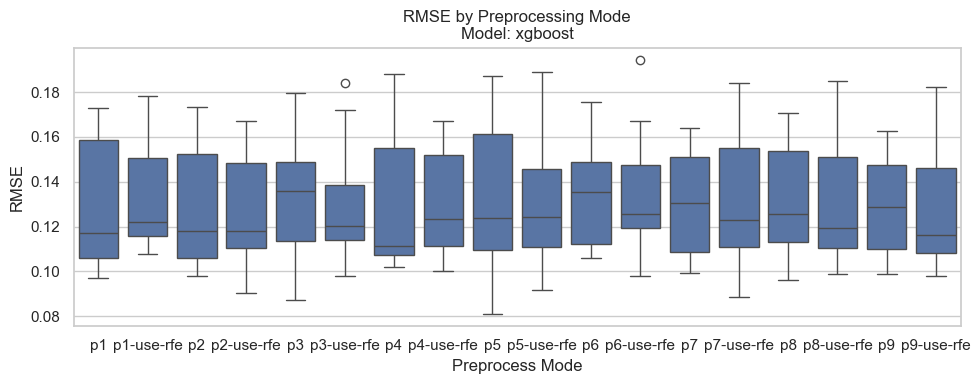

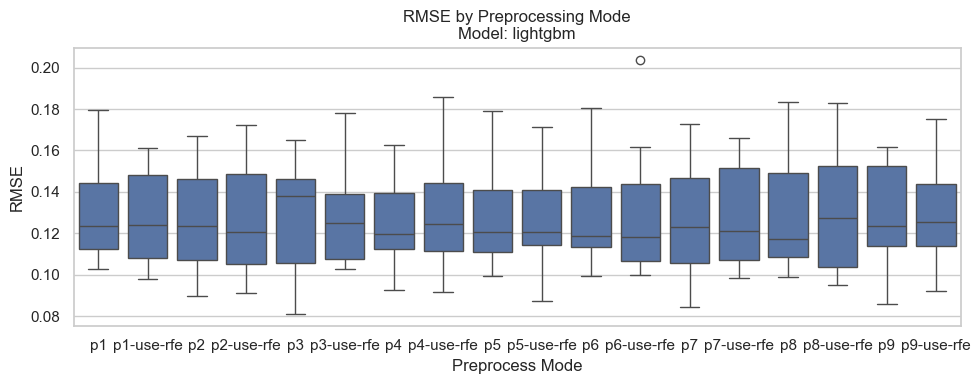

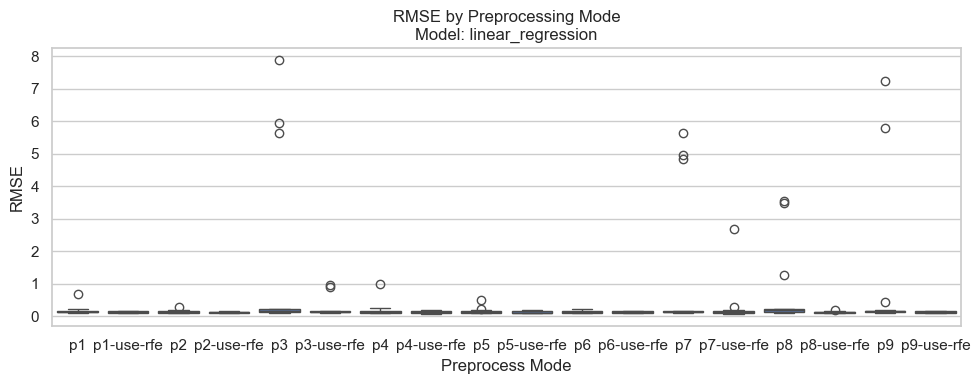

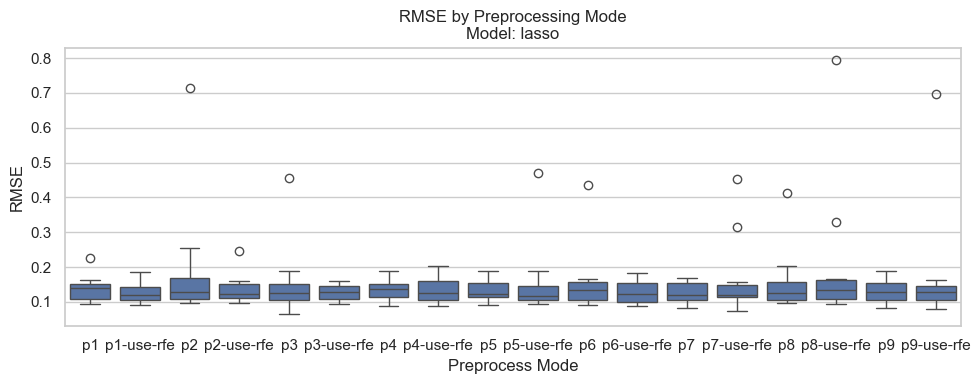

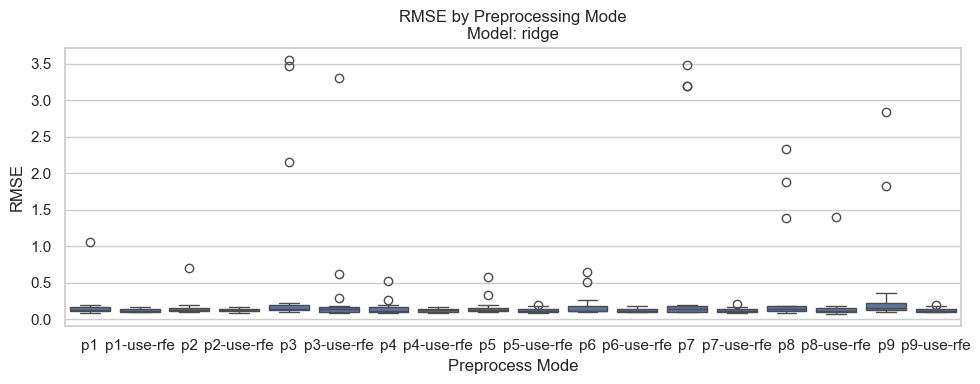

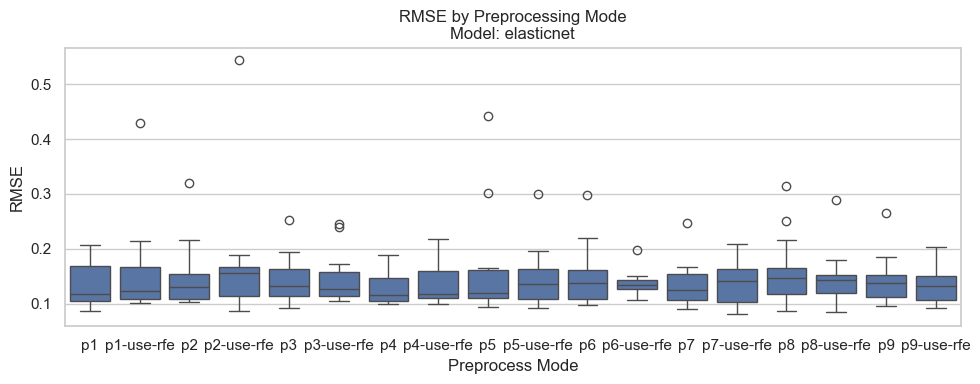

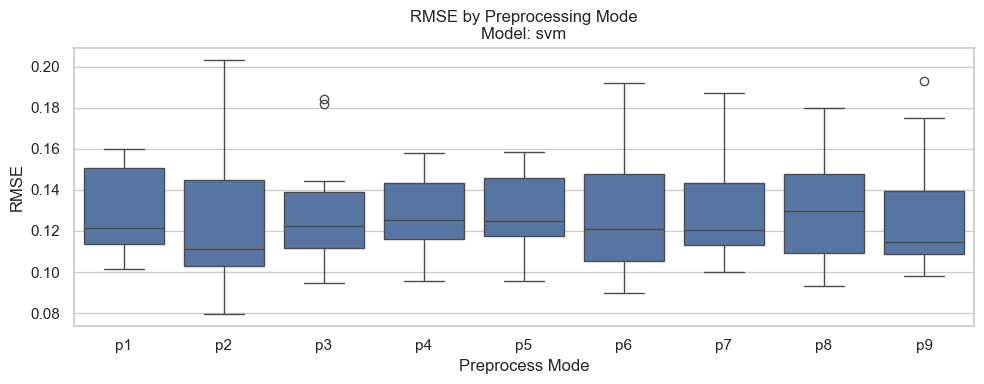

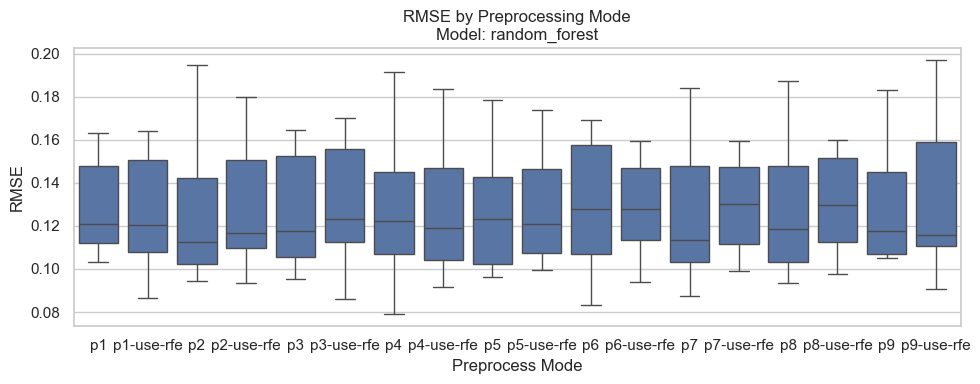

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot style
sns.set(style="whitegrid")

# Loop through each model
for model_name in results_df['model'].unique():
    plt.figure(figsize=(10, 4))
    
    # Filter only rows of that model
    subset = results_df[results_df['model'] == model_name]
    # subset = subset[subset["use_rfe"]]
    
    # Plot boxplot
    sns.boxplot(data=subset, x='preprocess_rfe_mode', y='rmse')
    plt.title(f"RMSE by Preprocessing Mode\nModel: {model_name}")
    plt.xlabel("Preprocess Mode")
    plt.ylabel("RMSE")
    # plt.xticks([0, 1], ['False', 'True'])  # Prettify boolean axis
    
    plt.tight_layout()
    plt.show()


In [20]:
best_modes = (
    results_df.groupby(['model', 'preprocess_rfe_mode'])['rmse']
    .mean()
    .reset_index()
    .sort_values(['model', 'rmse'])
    .groupby('model')
    .first()
    .reset_index()
)
print(best_modes)


               model preprocess_rfe_mode      rmse
0           catboost                  p2  0.126466
1         elasticnet                  p4  0.128281
2              lasso          p1-use-rfe  0.125537
3           lightgbm                  p4  0.126835
4  linear_regression          p4-use-rfe  0.124376
5      random_forest                  p2  0.124515
6              ridge          p5-use-rfe  0.124616
7                svm                  p2  0.126419
8            xgboost          p2-use-rfe  0.128527
